In [ ]:
dklsjkdf

NameError: name 'dklsjkdf' is not defined

In [ ]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#loading data from the csv file

df_solar = pd.read_csv('solar_generation_selected_features.csv')

In [ ]:
#preprocessing data to seprate features and target data

X = df_solar.drop('Solar Production (kWh)', axis=1)  # Features
y = df_solar['Solar Production (kWh)']  # Target

In [ ]:
#scaling the features

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#splitting the data into train,val and test--
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


In [ ]:
#initializing and train the tree regressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error

# Predict on validation set
y_val_pred = tree_regressor.predict(X_val)

# Calculate evaluation metrics on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)  # Mean Squared Error
rmse_val = np.sqrt(mse_val)  # Root Mean Squared Error
r2_val = r2_score(y_val, y_val_pred)  # R-squared
mae_val = mean_absolute_error(y_val, y_val_pred)  # Mean Absolute Error

# Print validation metrics
print(f'Decision Tree Validation RMSE: {rmse_val}')
print(f'Decision Tree Validation R^2: {r2_val}')
print(f'Decision Tree Validation MAE: {mae_val}')


Decision Tree Validation RMSE: 0.621034026579129
Decision Tree Validation R^2: 0.8484108567740675
Decision Tree Validation MAE: 0.2621776259607173


In [ ]:
from sklearn.metrics import mean_absolute_error  # Ensure this is imported if not already

# Predicting on test set
y_test_pred = tree_regressor.predict(X_test)

# Calculating evaluation metrics on the test set
mse_test = mean_squared_error(y_test, y_test_pred)  # Mean Squared Error
rmse_test = np.sqrt(mse_test)  # Root Mean Squared Error
r2_test = r2_score(y_test, y_test_pred)  # R-squared
mae_test = mean_absolute_error(y_test, y_test_pred)  # Mean Absolute Error

# Printing test metrics
print(f'Decision Tree Test RMSE: {rmse_test}')
print(f'Decision Tree Test R^2: {r2_test}')
print(f'Decision Tree Test MAE: {mae_test}')


Decision Tree Test RMSE: 0.6105068391775754
Decision Tree Test R^2: 0.8650583748828714
Decision Tree Test MAE: 0.25860068259385666


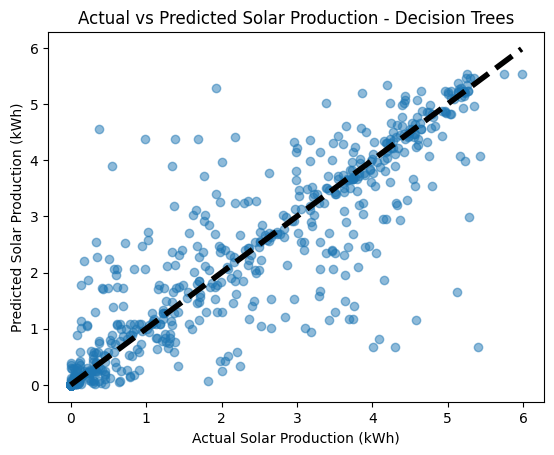

In [ ]:
# Plotting the actual vs predicted values for visual comparison
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual Solar Production (kWh)')
plt.ylabel('Predicted Solar Production (kWh)')
plt.title('Actual vs Predicted Solar Production - Decision Trees')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line to show perfect prediction
plt.show()

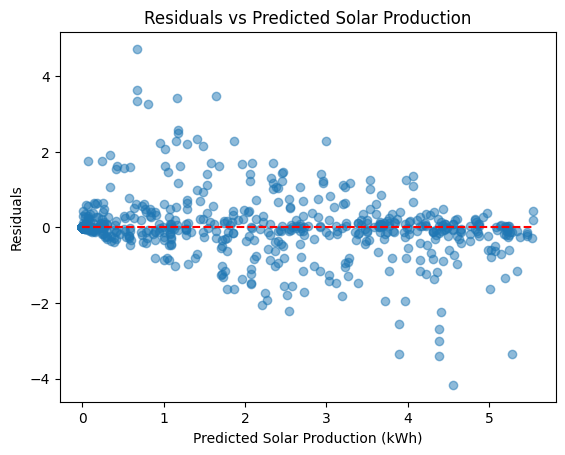

In [ ]:
# Correcting the residuals plot
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Solar Production (kWh)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Solar Production')
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red', linestyles='--')
plt.show()


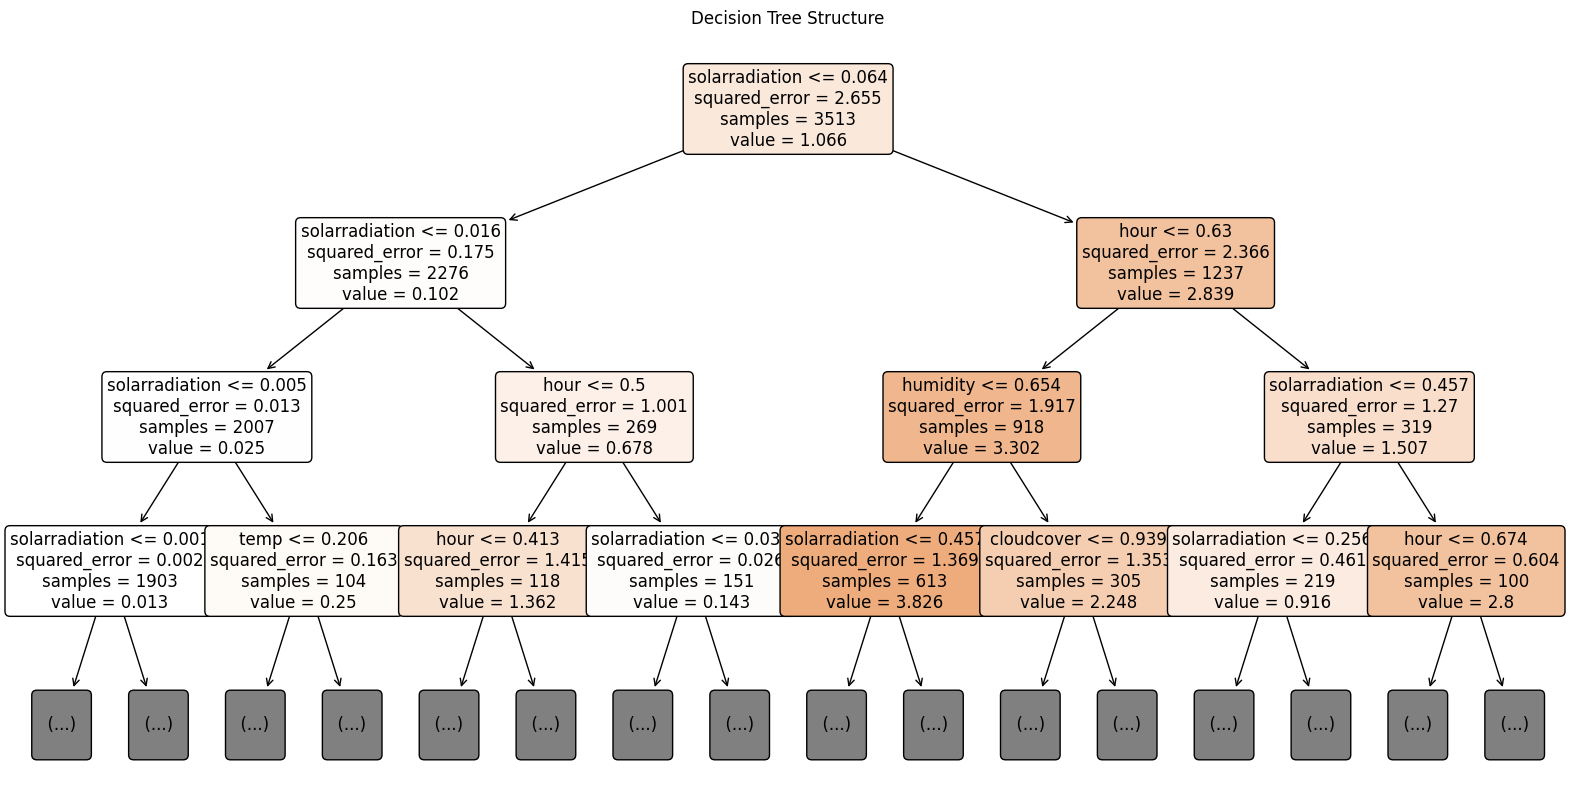

In [ ]:
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor,
          filled=True,
          rounded=True,
          feature_names=X.columns,
          max_depth=3,  # Limit the depth of the tree for a clear visual (optional)
          fontsize=12)
plt.title('Decision Tree Structure')
plt.show()